

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I choose to analyze TMDb Movie Data, and I am exited to discover the following:  


1- Which movie has the maximum profit and which one has the minimum? 

2-  A) Which release year has the maximum profits and which one has the minimum? B) B- How does the profit average change over release years?
 
3- What are the top 10 movies watched?

4- What is the average runtime by release year?

5- How popularity change according to runtime?


In [52]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import pprint 
import seaborn as sb
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [53]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movies_df = pd.read_csv("tmdb-movies.csv")
movies_df.head(10)

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   
5  281957  tt1663202    9.110700  135000000   532950503   
6   87101  tt1340138    8.654359  155000000   440603537   
7  286217  tt3659388    7.667400  108000000   595380321   
8  211672  tt2293640    7.404165   74000000  1156730962   
9  150540  tt2096673    6.326804  175000000   853708609   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   
5                  The Revenant   
6            Terminator Genisys   
7                   The Martian   
8                       Minions   
9                    Inside Out   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
5  Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...   
6  Arnold Schwarzenegger|Jason Clarke|Emilia Clar...   
7  Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...   
8  Sandra Bullock|Jon Hamm|Michael Keaton|Allison...   
9  Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...   

                                            homepage  \
0                      http://www.jurassicworld.com/   
1                        http://www.madmaxmovie.com/   
2     http://www.thedivergentseries.movie/#insurgent   
3  http://www.starwars.com/films/star-wars-episod...   
4                           http://www.furious7.com/   
5       http://www.foxmovies.com/movies/the-revenant   
6                    http://www.terminatormovie.com/   
7        http://www.foxmovies.com/movies/the-martian   
8                       http://www.minionsmovie.com/   
9                http://movies.disney.com/inside-out   

                         director  \
0                 Colin Trevorrow   
1                   George Miller   
2                Robert Schwentke   
3                     J.J. Abrams   
4                       James Wan   
5  Alejandro GonzÃ¡lez IÃ±Ã¡rritu   
6                     Alan Taylor   
7                    Ridley Scott   
8        Kyle Balda|Pierre Coffin   
9                     Pete Docter   

                                           tagline      ...       \
0                                The park is open.      ...        
1                               What a Lovely Day.      ...        
2                       One Choice Can Destroy You      ...        
3                    Every generation has a story.      ...        
4                              Vengeance Hits Home      ...        
5  (n. One who has returned, as if from the dead.)      ...        
6                                 Reset the future      ...        
7                                   Bring Him Home      ...        
8     Before Gru, they had a history of bad bosses      ...        
9         Meet the little voices inside your head.      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   
5  In the 1820s, a frontiersman, Hugh Glass, sets...     156   
6  The year is 2029. John Connor, leader of the r...     125   
7  During a manned mission to Mars, Astronaut Mar...     141   
8  M



### Data Cleaning 

In [54]:
# dropping not important columns in my opinion  
drop_columns = [ 'id', 'imdb_id', 'homepage', 'keywords', 'overview','tagline','budget_adj','revenue_adj']
movies_df = movies_df.drop(drop_columns, 1)
movies_df.head(5)

popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   
3      136   Action|Adventure|Science Fiction|Fantasy   
4      137                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   06/09/2015        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...   04/01/2015        2947   

   vote_average  release_year  
0           6.5          2015  
1           7.1          2015  
2           6.3          2015  
3           7.5          2015  
4           7.3          2015

In [55]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
rows, col = movies_df.shape
print('{} rows and {} columns'.format(rows-1, col))



10865 rows and 13 columns


In [56]:
#we will see how many duplicates we have in our dataset 

movies_df.duplicated().sum()


1

So that means we have 1 row duplicates our of 10865

In [57]:
movies_df.drop_duplicates(keep = 'first', inplace = True)
rows, col = movies_df.shape
print('{} rows and {} columns'.format(rows-1, col))



10864 rows and 13 columns


Now we drop duplicates 

In [58]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 1.2+ MB


We notice that release_date is not Date type so we need to convert it

In [59]:
# To convert release_date to date type 
movies_df.release_date = pd.to_datetime(movies_df['release_date'])
movies_df.head(5)

popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   
3      136   Action|Adventure|Science Fiction|Fantasy   
4      137                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15        5292   
4  Universal Pictures|Original Film|Media Rights ...   2015-04-01        2947   

   vote_average  release_year  
0           6.5          2015  
1           7.1          2015  
2           6.3          2015  
3           7.5          2015  
4           7.3          2015

In [60]:
# now we will see the nulls we have and which columns exactly 
movies_df.isnull().sum()


popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [61]:
movies_df.fillna(0)
print()

In [62]:
# we will replace zeros in runtime column with nan 
movies_df['runtime'] =movies_df['runtime'].replace(0, np.nan)

In [63]:
# We will replace zeros in budget and revenue columns with nan then we will drop them 
bud_rev=['budget', 'revenue']
movies_df[bud_rev] = movies_df[bud_rev].replace(0, np.nan)
movies_df.dropna(subset = bud_rev, inplace = True)
rows, col = movies_df.shape
print('{} is the rows that we have after dropping zeros'.format(rows-1))

3853 is the rows that we have after dropping zeros


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Which movie has the maximum profit and which one has the minimum)

In [64]:
# we need to calculate profits per movie (profites = revenue - budget) by adding new column 

movies_df.insert(2,'profits',movies_df['revenue']-movies_df['budget'])
movies_df.head(5)

popularity       budget       profits       revenue  \
0   32.985763  150000000.0  1.363529e+09  1.513529e+09   
1   28.419936  150000000.0  2.284364e+08  3.784364e+08   
2   13.112507  110000000.0  1.852382e+08  2.952382e+08   
3   11.173104  200000000.0  1.868178e+09  2.068178e+09   
4    9.335014  190000000.0  1.316249e+09  1.506249e+09   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  \
0    124.0  Action|Adventure|Science Fiction|Thriller   
1    120.0  Action|Adventure|Science Fiction|Thriller   
2    119.0         Adventure|Science Fiction|Thriller   
3    136.0   Action|Adventure|Science Fiction|Fantasy   
4    137.0                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15        5292   
4  Universal Pictures|Original Film|Media Rights ...   2015-04-01        2947   

   vote_average  release_year  
0           6.5          2015  
1           7.1          2015  
2           6.3          2015  
3           7.5          2015  
4           7.3          2015

In [65]:
# we notice that budget, profits and revenues data type converted to float, so we need to convert it to int.

type_convert=['budget', 'revenue','profits']
movies_df[type_convert]=movies_df[type_convert].applymap(np.int64)
movies_df.dtypes
movies_df.head(5)

popularity     budget     profits     revenue  \
0   32.985763  150000000  1363528810  1513528810   
1   28.419936  150000000   228436354   378436354   
2   13.112507  110000000   185238201   295238201   
3   11.173104  200000000  1868178225  2068178225   
4    9.335014  190000000  1316249360  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  \
0    124.0  Action|Adventure|Science Fiction|Thriller   
1    120.0  Action|Adventure|Science Fiction|Thriller   
2    119.0         Adventure|Science Fiction|Thriller   
3    136.0   Action|Adventure|Science Fiction|Fantasy   
4    137.0                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15        5292   
4  Universal Pictures|Original Film|Media Rights ...   2015-04-01        2947   

   vote_average  release_year  
0           6.5          2015  
1           7.1          2015  
2           6.3          2015  
3           7.5          2015  
4           7.3          2015

In [66]:
# we will discover now which movie has the max profits and which one has the min 

def Max_min(column):
    max= movies_df[column].idxmax()
    max_info=pd.DataFrame(movies_df.loc[max])
    min= movies_df[column].idxmin()
    min_info =pd.DataFrame(movies_df.loc[min])
    
    return pd.concat([max_info, min_info], axis=1)
Max_min('profits')

1386  \
popularity                                                      9.43277   
budget                                                        237000000   
profits                                                      2544505847   
revenue                                                      2781505847   
original_title                                                   Avatar   
cast                  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
director                                                  James Cameron   
runtime                                                             162   
genres                         Action|Adventure|Fantasy|Science Fiction   
production_companies  Ingenious Film Partners|Twentieth Century Fox ...   
release_date                                        2009-12-10 00:00:00   
vote_count                                                         8458   
vote_average                                                        7.1   
release_year                                                       2009   

                                                                   2244  
popularity                                                      0.25054  
budget                                                        425000000  
profits                                                      -413912431  
revenue                                                        11087569  
original_title                                        The Warrior's Way  
cast                  Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...  
director                                                     Sngmoo Lee  
runtime                                                             100  
genres                        Adventure|Fantasy|Action|Western|Thriller  
production_companies                           Boram Entertainment Inc.  
release_date                                        2010-12-02 00:00:00  
vote_count                                                           74  
vote_average                                                        6.4  
release_year                                                       2010

Avatar2009 is the maximum profit while The Warrior's Way is the minimum in our dataset 

### Research Question 2  (A- Which release year has the maximum profits and which one has the minimum)

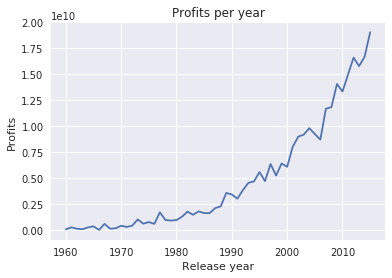

In [70]:
# We will use group by each group and sum profits for each year 
profits_year = movies_df.groupby('release_year')['profits'].sum()
plt.title('Profits per year')
plt.plot(profits_year)
plt.xlabel('Release year')
plt.ylabel('Profits')
plt.show()

This chart shows the profits in (len10) due to the large numbers that doesn't fit. It shows the increasing of profits by release year. for example in 1960 there is no profits (almost 0)  while in 2015 there ar more than 17.5 billion profits 

In [71]:
# we will calculate which release year has the minmum profits 
profits_year.idxmin()

1966

In [72]:
# we will calculate which release year has the maximun profits 
profits_year.idxmax()

2015

### Research Question 2  (B- How does the profit average change over release years?)

Text(0,0.5,'profit average')

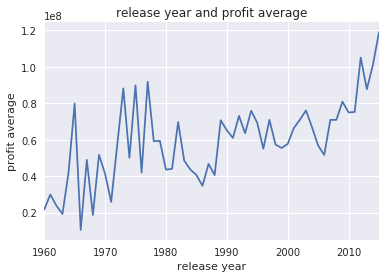

In [73]:
# We will discover Which release year has the maximum and minimum profits average by finiding the mean of profits of movies for each year 
movies_df.groupby('release_year')['profits'].mean().plot()
plt.title("release year and profit average")
plt.xlabel('release year')
plt.ylabel('profit average')

The profits average is not stable between 1960- 1990 but it looks more stable and gets profitable between 1990 to 2015

### Research Question 3  (What are the top 10 movies watched?)

Text(0.5,0,'Vote Average')

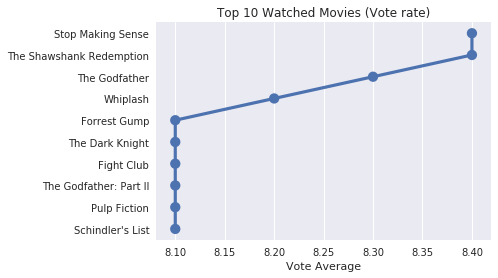

In [74]:
# we will discover here which top 10 movies we have by sorting values and plot the result  
top = pd.DataFrame(movies_df['vote_average'].sort_values(ascending = False))
top ['original_title'] = movies_df['original_title']
data = list(map(str,(top['original_title'])))
x = list(data[:10])
y = list(top['vote_average'][:10])
ax = sb.pointplot(x=y,y=x)
ax.set_title("Top 10 Watched Movies (Vote rate)")
ax.set_xlabel("Vote Average")

 The 2 top watched movies are (Stop making sense and the shawshank) with 8.40 vote average 
 
 The 3 top watched movie is (the godfather) with 8.30 
 
 The 4 top watched movie is (whiplash) with 8.20 
 
 and finally we notice that the 5-10 top movies have the same vote average 8.10
 

### Research Question 4  (What is the average runtime by release year?)

Text(0,0.5,'runtime')

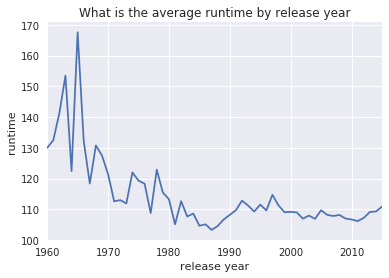

In [75]:
# We will plot and calculate the mean 
movies_df.groupby('release_year').mean()['runtime'].plot()
sb.set(rc={'figure.figsize':(10,5)})
plt.title("What is the average runtime by release year")
plt.xlabel('release year')
plt.ylabel('runtime')

We can notice that the average runtime is decreasing over years, it is considered in peak between 1960 to 1970 with between 130-170 runtime then it goes to be between 105 to 120 runtime in 1981 to 2015

### Research Question 5 (How popularity change according to runtime?)


0.215092414306


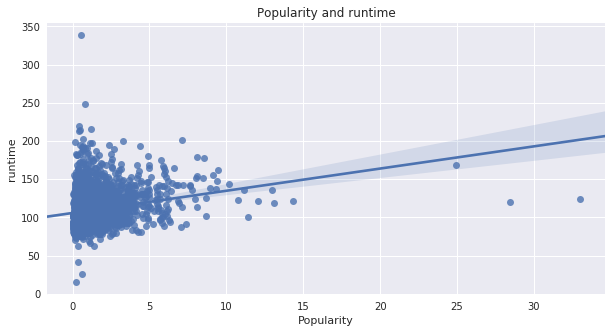

In [76]:
# we will use regplot and corr() to know how popularity change according to runtime
ax = sb.regplot(x= movies_df['popularity'],y= movies_df['runtime'])
ax.set_title("Popularity and runtime")
ax.set_xlabel("Popularity")
ax.set_ylabel("runtime")
sb.set(rc={'figure.figsize':(6,4)})
corr = movies_df.corr()
print(corr.loc['popularity','runtime'])

r = 0.215 (positive correlation), which means that once popularity gets larger the runtime will be larger

<a id='conclusions'></a>
## Conclusions

> **Tip**: 
After analyzing and discovering TMDb movie data I can answer my posing question in introduction: 

1- Avatar has the maximum profit and The Warrior's Way has the minimum

2-  A) 1966 is the release year that has the maximum profits and 2015 is the release year that has the minimum

 B) The profits average is not stable between 1960- 1990 but it looks more stable and gets profitable between 1990 to 2015
 
3- By discovering what are the top 10 movies watched, the chart shows that the 2 top watched movies are (Stop making sense and the shawshank) with 8.40 vote average 
 
 The 3 top watched movie is (the godfather) with 8.30 
 
 The 4 top watched movie is (whiplash) with 8.20 
 
 and finally we notice that the 5-10 top movies have the same vote average 8.10

4- The average runtime is decreasing over years, it is considered in peak between 1960 to 1970 with between 130-170 runtime then it goes to be between 105 to 120 runtime in 1981 to 2015

5- By calculating the correlation the popularity change according to runtime with 0.215 (positive) 


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [77]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0